In [2]:
import os 
import pandas as pd
from collections import Counter
from tqdm import tqdm
file_2 = open(r"E:\top200.txt")
tag_dict = {}
hashtag_list = [] 
for line in file_2.readlines():
    line=line.strip('\n')
    one_hashtag = str(line).split(' ')
    tag_dict[one_hashtag[0]] = one_hashtag[2]
    hashtag_list.append(one_hashtag[0])
hashtag_set = set(hashtag_list)
    

In [27]:
rootdir = 'E:\hashtags'
list_ = os.listdir(rootdir) #列出文件夹下所有的目录与文件
for i in tqdm(range(0,10)):
    path = os.path.join(rootdir,list_[i])
    #df = pd.read_table(path)
    file = open(path,encoding='utf-8')
    all_user_dict={} #存储每个月份的用户id以及对应的hashtag
    for line in file.readlines():  
        line = line.strip('\n')
        one_tweet = str(line).split(' ')
        #print(one_tweet[1:])
        for hashtag in one_tweet[1:]:
            all_user_dict.setdefault(one_tweet[0],[]).append(hashtag)
    conver_tag_dict = {}#将每个用户对应的hashtag转化为标签
    for key in all_user_dict:   
        for one_user_hashtag in all_user_dict[key]:
            if one_user_hashtag in hashtag_set:
                conver_tag_dict.setdefault(key,[]).append(tag_dict[one_user_hashtag])
    #对每个用户的标签进行计数并存储
    save_root = "E:\\result\\hashtag_conver_tag_1to8\\"+str(list_[i][0:15])+"_conver_tag.txt"
    f1 = open(save_root,'w')
    for conver_tag_key in conver_tag_dict:
        one_user_hashtag_list = conver_tag_dict[conver_tag_key]
        trump_num = one_user_hashtag_list.count("trump")
        biden_num = one_user_hashtag_list.count("biden")
        sum_num = len(one_user_hashtag_list)
        f1.write(str(conver_tag_key)+" "+str(trump_num)+" "+str(biden_num)+ ' '+str(sum_num)+"\n")
    f1.close()       

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:53<00:00, 35.33s/it]


In [ ]:
rootdir = '/home/kayzhou/zhangyue/text/data_GCN'
list_ = os.listdir(rootdir) #列出文件夹下所有的目录与文件
for i in tqdm(range(0,10)):
    path = os.path.join(rootdir,list_[i])
    #df = pd.read_table(path)
    file = open(path,encoding='utf-8')
    all_user_dict={} #存储每个月份的用户id以及对应的hashtag
    for line in file.readlines():  
        line = line.strip('\n')
        one_tweet = str(line).split(' ')
        #print(one_tweet[1:])
        for hashtag in one_tweet[1:]:
            all_user_dict.setdefault(one_tweet[0],[]).append(hashtag)
    conver_tag_dict = {}#将每个用户对应的hashtag转化为标签
    for key in all_user_dict:   
        for one_user_hashtag in all_user_dict[key]:
            if one_user_hashtag in hashtag_set:
                conver_tag_dict.setdefault(key,[]).append(tag_dict[one_user_hashtag])
    #对每个用户的标签进行计数并存储
    save_root = "E:\\result\\hashtag_conver_tag_1to8\\"+str(list_[i][0:15])+"_conver_tag.txt"
    f1 = open(save_root,'w')
    for conver_tag_key in conver_tag_dict:
        one_user_hashtag_list = conver_tag_dict[conver_tag_key]
        trump_num = one_user_hashtag_list.count("trump")
        biden_num = one_user_hashtag_list.count("biden")
        sum_num = len(one_user_hashtag_list)
        f1.write(str(conver_tag_key)+" "+str(trump_num)+" "+str(biden_num)+ ' '+str(sum_num)+"\n")
    f1.close()  

In [ ]:
rootdir = 'E:\\result\\hashtag_conver_tag_1to8'
list_ = os.listdir(rootdir)
all_user_trump_num_dict={}#每个用户在每个月中发表推文支持trump次数
all_user_biden_num_dict = {}
for i in tqdm(range(1,11)):
    path = os.path.join(rootdir,list_[i])
    print(list_[i])
    #df = pd.read_table(path)
    file = open(path,encoding='utf-8')
    for line in file.readlines():  
        line = line.strip('\n')
        one_user = str(line).split(' ')
        all_user_trump_num_dict.setdefault(one_user[0],[]).append(one_user[1])
        all_user_biden_num_dict.setdefault(one_user[0],[]).append(one_user[2])

In [ ]:
all_user_1to10_dict = {}#一个用户对应两个值，一个为支持trump数量一个为支持拜登
for user_id in tqdm(all_user_trump_num_dict):    
    trump_sum = sum([int(x) for x in  all_user_trump_num_dict[user_id]])
    biden_sum = sum([int(x) for x in  all_user_biden_num_dict[user_id]])
    all_user_1to10_dict.setdefault(user_id,[]).append(trump_sum)
    all_user_1to10_dict.setdefault(user_id,[]).append(biden_sum)

100%|█████████████████████████████████████████████████████████████████████| 2664169/2664169 [01:08<00:00, 39121.15it/s]


In [ ]:
save_root = "E:\\result\\hashtag_conver_tag_1to8\\"+"1-10"+"_conver_tag.txt"
f1 = open(save_root,'w')
for user_id in all_user_1to10_dict:
    trump_num = all_user_1to10_dict[user_id][0]
    biden_num = all_user_1to10_dict[user_id][1]
    sum_num = sum(all_user_1to10_dict[user_id])
    f1.write(str(user_id)+" "+str(trump_num)+" "+str(biden_num)+ ' '+str(sum_num)+"\n")
f1.close()    

In [ ]:
import os 
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
title_list = ["202001-202010","202001-202008","202001","202002",
              "202003","202004","202005","202006","202007","202008","202009","202010"]
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
rootdir = 'E:\\result\\hashtag_conver_tag_1to8'
list_ = os.listdir(rootdir)
for i in tqdm(range(0,12)):
    path = os.path.join(rootdir,list_[i])
    df = pd.read_table(path,sep=" ",header = None,
                            names=["user_id","trump","biden","sum"])    
    plt.hist(x = df["trump_precent"], # 指定绘图数据
              bins = 20, # 指定直方图中条块的个数
              color = 'steelblue', # 指定直方图的填充色
              edgecolor = 'black' # 指定直方图的边框色
              )
    # 添加x轴和y轴标签
    plt.xlabel('支持trump的百分比')
    plt.ylabel('频数')
    # 添加标题
    title = str(title_list[i]) + "支持trump的百分比直方图"
    plt.title(title)
    # 显示图形
    save_path = 'E:\\result\\picture\\' + title + ".png"
    #plt.show()
    plt.savefig(save_path,dpi=200)
    plt.show()

  0%|                                                                                           | 0/12 [00:02<?, ?it/s]

0          1-10_conver_tag.txt
1          1-10_conver_tag.txt
2          1-10_conver_tag.txt
3          1-10_conver_tag.txt
4          1-10_conver_tag.txt
                  ...         
2664164    1-10_conver_tag.txt
2664165    1-10_conver_tag.txt
2664166    1-10_conver_tag.txt
2664167    1-10_conver_tag.txt
2664168    1-10_conver_tag.txt
Name: year, Length: 2664169, dtype: object


In [ ]:
#绘制密度图
import os 
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


title_list = ["202001-202010","202001-202008","202001","202002",
              "202003","202004","202005","202006","202007","202008","202009","202010"]
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
rootdir = 'E:\\result\\hashtag_conver_tag_1to8'
list_ = os.listdir(rootdir)
all_=pd.DataFrame(columns=["trump_precent","year"])
for i in tqdm(range(2,10)):
    path = os.path.join(rootdir,list_[i])
    df = pd.read_table(path,sep=" ",header = None,
                            names=["user_id","trump","biden","sum"])
    df["trump_precent"] = df["trump"]/df["sum"]
    df["year"]=[title_list[i]]*len(df["user_id"])
    all_=pd.concat([all_,df[["trump_precent","year"]]],axis=0)
    # Initialize the FacetGrid object



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.44it/s]


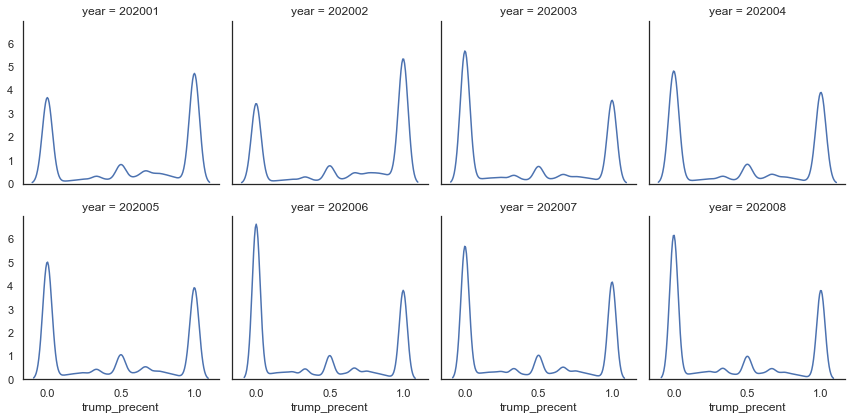

In [ ]:
sns.set_theme(style="white", palette=None)
g = sns.FacetGrid(all_, col="year", col_wrap=4)
g.map(sns.kdeplot, "trump_precent")

In [ ]:
import os 
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
title_list = ["202001-202010","202001-202008","202001","202002",
              "202003","202004","202005","202006","202007","202008","202009","202010"]
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
rootdir = 'E:\\result\\hashtag_conver_tag_1to8'
list_ = os.listdir(rootdir)
for i in tqdm(range(0,12)):
    path = os.path.join(rootdir,list_[i])
    df = pd.read_table(path,sep=" ",header = None,
                            names=["user_id","trump","biden","sum"])
    df["trump_precent"] = df["trump"]/df["sum"]
    df["tag"] = ["0" if j<=0.05 else("2" if j<0.95 else "1") for j in df["trump_precent"]]
    df_save = df.query('tag=="0" | tag=="1"')
    print(df_save)
    title = str(title_list[i])
    save_path = 'E:\\result\\picture\\' + title + ".txt"
    f1 = open(save_path,'w')
    for user_id,tag in zip(df_save["user_id"],df_save["tag"]):
        f1.write(str(user_id) + ' ' + str(tag)+"\n")
    f1.close()   


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

                     user_id  trump  biden  sum  trump_precent tag
0         880971030302515200      1     59   60       0.016667   0
14       1122352928969428992      0    117  117       0.000000   0
18       1183780198002634758     28      1   29       0.965517   1
20        872138884137840640    167      0  167       1.000000   1
25                 214822628     43      1   44       0.977273   1
...                      ...    ...    ...  ...            ...  ..
2664164  1114715746641350663      1      0    1       1.000000   1
2664165   932798635804311552      1      0    1       1.000000   1
2664166  1132486195307528192      0      1    1       0.000000   0
2664167  1163867260668145664      1      0    1       1.000000   1
2664168           1487720659      1      0    1       1.000000   1

[1756776 rows x 6 columns]



  8%|██████▉                                                                            | 1/12 [00:08<01:33,  8.52s/it]

                     user_id  trump  biden  sum  trump_precent tag
0         880971030302515200      1     55   56       0.017857   0
14       1122352928969428992      0    110  110       0.000000   0
18       1183780198002634758     28      1   29       0.965517   1
20        872138884137840640    167      0  167       1.000000   1
25                 214822628     43      1   44       0.977273   1
...                      ...    ...    ...  ...            ...  ..
2176224   895362196850577408      0      1    1       0.000000   0
2176226  1159624933280014337      0      1    1       0.000000   0
2176227  1291649007161413633      0      2    2       0.000000   0
2176228            105272257      0      1    1       0.000000   0
2176229            278925187      1      0    1       1.000000   1

[1458583 rows x 6 columns]



 17%|█████████████▊                                                                     | 2/12 [00:12<00:58,  5.89s/it]

                    user_id  trump  biden  sum  trump_precent tag
5                3362592598      3      0    3            1.0   1
14      1122352928969428992      0     24   24            0.0   0
18      1183780198002634758     10      0   10            1.0   1
20       872138884137840640     17      0   17            1.0   1
25                214822628     18      0   18            1.0   1
...                     ...    ...    ...  ...            ...  ..
324755           3947336593      3      0    3            1.0   1
324756            258190414      0      1    1            0.0   0
324757            479020792      2      0    2            1.0   1
324758              7964842      1      0    1            1.0   1
324759  1033488146208616450      0      1    1            0.0   0

[234313 rows x 6 columns]



 25%|████████████████████▊                                                              | 3/12 [00:13<00:31,  3.53s/it]

                    user_id  trump  biden  sum  trump_precent tag
5                    755103      0      1    1            0.0   0
15      1019352889096134656      0      1    1            0.0   0
24               4253133693      2      0    2            1.0   1
26               2772161355      1      0    1            1.0   1
28       806630799315505153      5      0    5            1.0   1
...                     ...    ...    ...  ...            ...  ..
379812   863974532926799872      1      0    1            1.0   1
379813            982000550      1      0    1            1.0   1
379814           2595739767      1      0    1            1.0   1
379816  1230178150295855104      1      0    1            1.0   1
379817             24462007      2      0    2            1.0   1

[275773 rows x 6 columns]



 33%|███████████████████████████▋                                                       | 4/12 [00:14<00:19,  2.47s/it]

                    user_id  trump  biden  sum  trump_precent tag
5       1199229943839969281     28      0   28            1.0   1
6                 147601825      1      0    1            1.0   1
9       1202614335790571522      0      1    1            0.0   0
10      1199169279767302145      0      1    1            0.0   0
11                 30577365      0     17   17            0.0   0
...                     ...    ...    ...  ...            ...  ..
459769  1167120172936658945      0      1    1            0.0   0
459770             89975329      0      1    1            0.0   0
459771             77862771      0      1    1            0.0   0
459772  1168775119767891969      1      0    1            1.0   1
459773   761257479737077760      1      0    1            1.0   1

[344373 rows x 6 columns]



 42%|██████████████████████████████████▌                                                | 5/12 [00:15<00:13,  1.98s/it]

                    user_id  trump  biden  sum  trump_precent tag
0        718116923137863681      0      1    1            0.0   0
1        958159277675302912      4      0    4            1.0   1
2                4903122266      0      1    1            0.0   0
5                 228587541      0      1    1            0.0   0
9                  20730783      2      0    2            1.0   1
...                     ...    ...    ...  ...            ...  ..
335683   846804354304786432      1      0    1            1.0   1
335684  1071806896435191808      1      0    1            1.0   1
335686            381745546      1      0    1            1.0   1
335687  1256067211325734917      1      0    1            1.0   1
335688  1247633543909572611      1      0    1            1.0   1

[256932 rows x 6 columns]



 50%|█████████████████████████████████████████▌                                         | 6/12 [00:15<00:09,  1.55s/it]

                    user_id  trump  biden  sum  trump_precent tag
3                3865752076      2      0    2            1.0   1
4       1246499496298565634      3      0    3            1.0   1
5                3735343036      2      0    2            1.0   1
7        820304560971345924      0     63   63            0.0   0
8       1245548705467392005     16      0   16            1.0   1
...                     ...    ...    ...  ...            ...  ..
506616  1206729678716694530      0      1    1            0.0   0
506617   761704475153330176      1      0    1            1.0   1
506618             16806337      0      1    1            0.0   0
506619  1263141595790094336      1      0    1            1.0   1
506620             22146175      0      1    1            0.0   0

[353860 rows x 6 columns]



 58%|████████████████████████████████████████████████▍                                  | 7/12 [00:17<00:07,  1.48s/it]

                    user_id  trump  biden  sum  trump_precent tag
0        925157550617632768      4      0    4            1.0   1
3                3283043868      1      0    1            1.0   1
5       1222553730589122561      1      0    1            1.0   1
13               1957947373      0      1    1            0.0   0
17      1260327308319010816      0      3    3            0.0   0
...                     ...    ...    ...  ...            ...  ..
965170            620665923      2      0    2            1.0   1
965173           1973774490      0      1    1            0.0   0
965175            218584495      0      1    1            0.0   0
965176           2875412814      1      0    1            1.0   1
965178  1016915990737838080      0      1    1            0.0   0

[685854 rows x 6 columns]



 67%|███████████████████████████████████████████████████████▎                           | 8/12 [00:19<00:06,  1.68s/it]

                    user_id  trump  biden  sum  trump_precent tag
4                  24004475      0      1    1            0.0   0
7       1274339329515585538      5      0    5            1.0   1
10      1046882265349931009      0    114  114            0.0   0
11       819609327518498816      1      0    1            1.0   1
12      1274533753956655105      0     27   27            0.0   0
...                     ...    ...    ...  ...            ...  ..
858883  1105984825050071040      0      1    1            0.0   0
858884            564812286      2      0    2            1.0   1
858885   910522222099468289      0      1    1            0.0   0
858886             58109631      0      1    1            0.0   0
858887             55749481      0      1    1            0.0   0

[596005 rows x 6 columns]



 75%|██████████████████████████████████████████████████████████████▎                    | 9/12 [00:21<00:05,  1.76s/it]

                    user_id  trump  biden  sum  trump_precent tag
1                3013785847     51      1   52       0.980769   1
3                3862641143      1     26   27       0.037037   0
5                 865355113      0      1    1       0.000000   0
6                 226201248      0      3    3       0.000000   0
7       1288290125017944064      1      0    1       1.000000   1
...                     ...    ...    ...  ...            ...  ..
768872  1291649007161413633      0      2    2       0.000000   0
768873  1283295672226193408      0      1    1       0.000000   0
768874            105272257      0      1    1       0.000000   0
768875             48945593      0      1    1       0.000000   0
768876            278925187      1      0    1       1.000000   1

[548641 rows x 6 columns]



 83%|████████████████████████████████████████████████████████████████████▎             | 10/12 [00:23<00:03,  1.74s/it]

                    user_id  trump  biden  sum  trump_precent tag
0                 276771015      2      0    2       1.000000   1
6       1300228453241966599      2      0    2       1.000000   1
7                  36652443      1     32   33       0.030303   0
9       1292551677044760577      0      2    2       0.000000   0
11      1140822647548198912      0      2    2       0.000000   0
...                     ...    ...    ...  ...            ...  ..
729051           2460575922      1      0    1       1.000000   1
729052             21088724      1      0    1       1.000000   1
729053  1033391259400986624      0      1    1       0.000000   0
729054  1189989428539711488      1      0    1       1.000000   1
729055           3970255997      0      1    1       0.000000   0

[502497 rows x 6 columns]



 92%|███████████████████████████████████████████████████████████████████████████▏      | 11/12 [00:24<00:01,  1.74s/it]

                    user_id  trump  biden  sum  trump_precent tag
0       1278784361622458368      1      0    1            1.0   1
6                 566442684      7      0    7            1.0   1
8        897552142365585411     34      0   34            1.0   1
9                 784755116      2      0    2            1.0   1
12                  9605212      0      6    6            0.0   0
...                     ...    ...    ...  ...            ...  ..
833922   932798635804311552      1      0    1            1.0   1
833923  1132486195307528192      0      1    1            0.0   0
833924  1163867260668145664      1      0    1            1.0   1
833925           1487720659      1      0    1            1.0   1
833926   836445753568546817      3      0    3            1.0   1

[599933 rows x 6 columns]


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:26<00:00,  2.21s/it]


In [ ]:
f1 = open(save_root,'w')
    for conver_tag_key in conver_tag_dict:
        one_user_hashtag_list = conver_tag_dict[conver_tag_key]
        trump_num = one_user_hashtag_list.count("trump")
        biden_num = one_user_hashtag_list.count("biden")
        sum_num = len(one_user_hashtag_list)
        f1.write(str(conver_tag_key)+" "+str(trump_num)+" "+str(biden_num)+ ' '+str(sum_num)+"\n")
    f1.close()   

In [ ]:
import pandas as pd
#准备做图
df_1to8 = pd.read_table(r"E:\result\hashtag_conver_tag_1to8\1-8_conver_tag.txt",
                        sep=" ",header = None,names=["user_id","trump","biden","sum"])
df_1to8.head(5)

,user_id,trump,biden,sum
0,880971030302515200,1,55,56
1,1182816702083600384,246,128,374
2,1025229243809062914,13,43,56
3,1118860157918818305,37,6,43
4,905952434945654785,54,200,254


In [ ]:
df_1to8["trump_precent"] = df_1to8["trump"]/df_1to8["sum"]

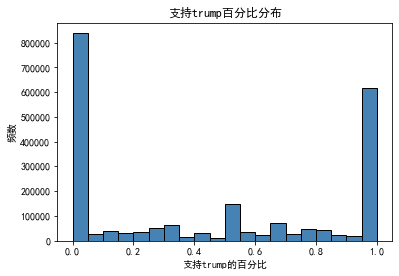

In [ ]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.pyplot.hist(x = df_1to8["trump_precent"], # 指定绘图数据
          bins = 20, # 指定直方图中条块的个数
          color = 'steelblue', # 指定直方图的填充色
          edgecolor = 'black' # 指定直方图的边框色
          )
# 添加x轴和y轴标签
matplotlib.pyplot.xlabel('支持trump的百分比')
matplotlib.pyplot.ylabel('频数')
# 添加标题
matplotlib.pyplot.title('支持trump百分比分布')
# 显示图形
matplotlib.pyplot.show()

In [ ]:
import os
rootdir = 'E:\hashtags'
list_ = os.listdir(rootdir)
print(list_[0][0:15])

hashtags-202001


In [ ]:
conver_tag_dict = {}#转换为标签的用户：标签字典
for key in all_user_dict:   
    for i in all_user_dict[key]:
        if i in hashtag_set:
            conver_tag_dict.setdefault(key,[]).append(tag_dict[i])
        
        

In [ ]:
support_trump_hashtag_precent = []
for key in conver_tag_dict:
    one_user_hashtag_list = conver_tag_dict[key]
    result = one_user_hashtag_list.count("trump")/len(one_user_hashtag_list)
    support_trump_hashtag_precent.append(result)

In [ ]:
print(len(support_trump_hashtag_precent ))

324760


In [ ]:
sorted(support_trump_hashtag_precent)[int(len(support_trump_hashtag_precent) * 0.5)]

0.6666666666666666

In [ ]:
import numpy as np
#用户支持特朗普的hashtag的比例分布
pd.DataFrame(support_trump_hashtag_precent).describe()

,0
count,324760.000000
mean,0.562034
std,0.434809
min,0.000000
25%,0.000000
50%,0.666667
75%,1.000000
max,1.000000


重新以新发的text为基础对1-10月用户发表推文中支持trump的比例进行计算并可视化

In [14]:
#以老师发的text为标准进行用户标注
import json
from tqdm import tqdm
rootdir = '/home/kayzhou/zhangyue/text/data_GCN'
list_ = os.listdir(rootdir)
user_tweet_label = {}
i=0
for one_month in list_:
    if "text" in one_month:
        i=i+1
        path = os.path.join(rootdir,one_month)
        for line in open(path,"r",encoding="utf8"):  
            line= json.loads(line)
            user_id = line["user_id"] 
            tweet_id =line["tweet_id"] 
            tweet_label = line["label"]
            user_tweet_label.setdefault((i,user_id),[]).append(tweet_label)
            

In [13]:
list_ = os.listdir(rootdir)[0:10]
list_ 

['rarlinux-x64-612.tar.gz',
 'rar',
 '202001-network.lj',
 '202001-text.lj',
 '202002-network.lj',
 '202002-text.lj',
 '202003-network.lj',
 '202003-text.lj',
 '202004-network.lj',
 '202004-text.lj']

In [8]:
for i in user_tweet_label:
    print(i)
    print(user_tweet_label[i])
    break


(1, '1183780198002634758')
['DT', 'DT', 'DT', 'DT', 'DT', 'DT']


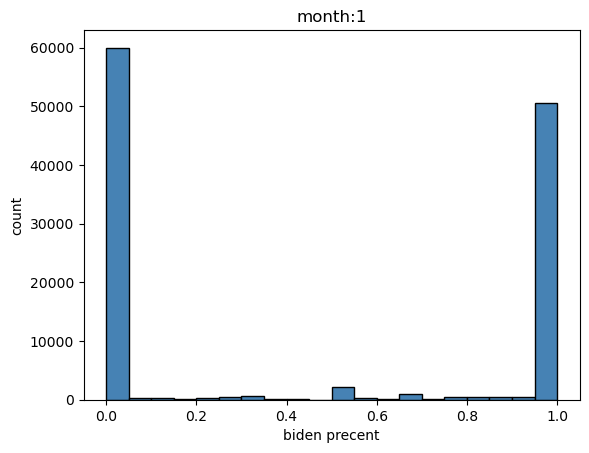

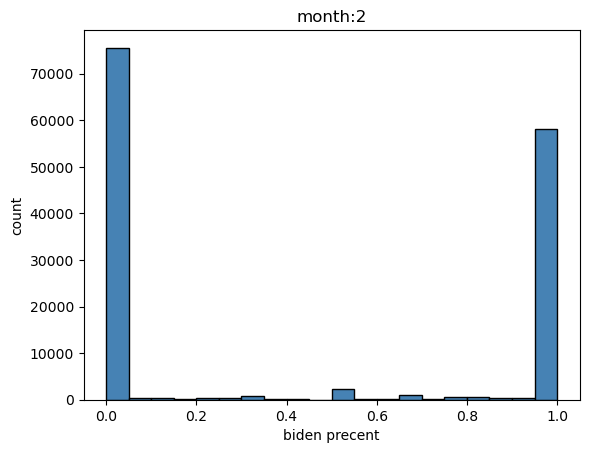

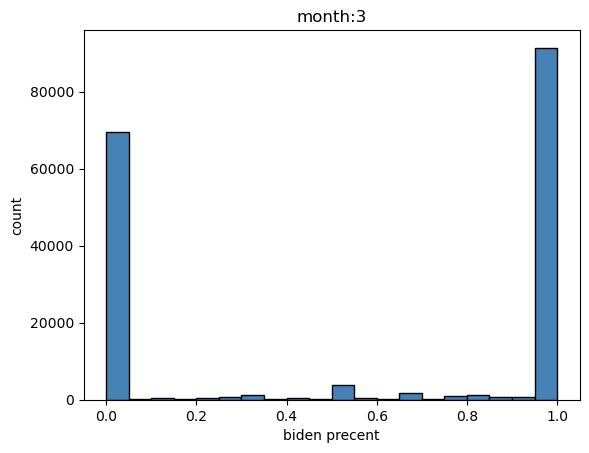

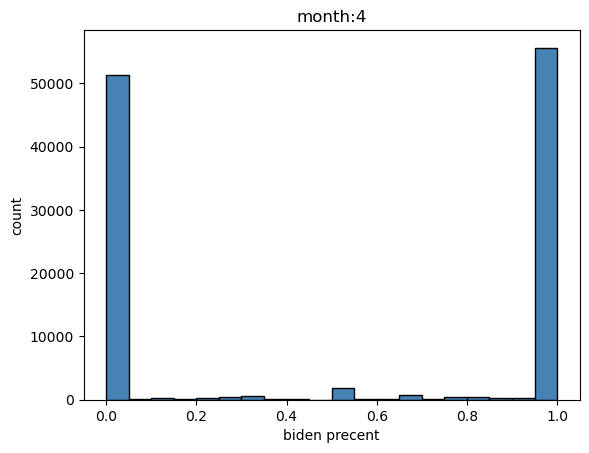

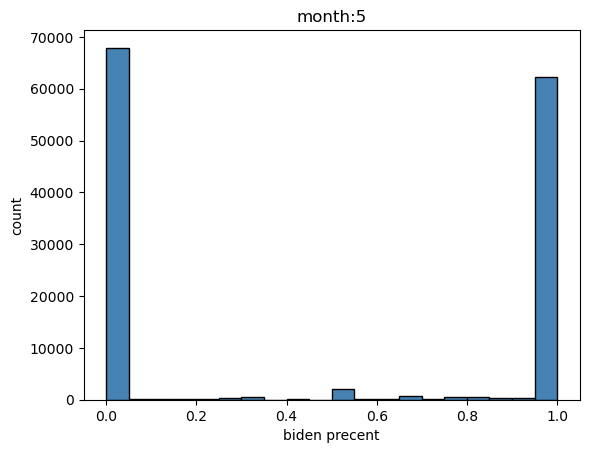

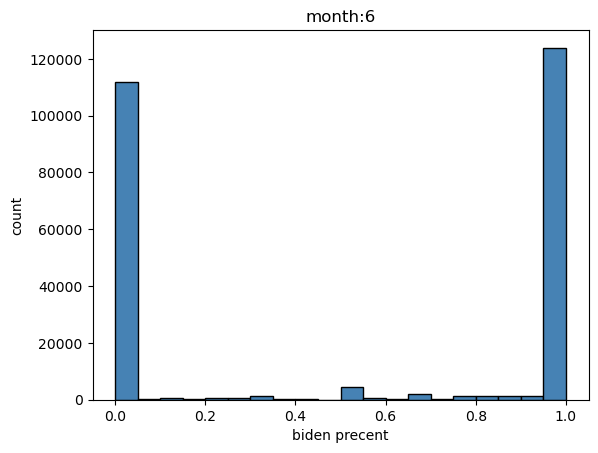

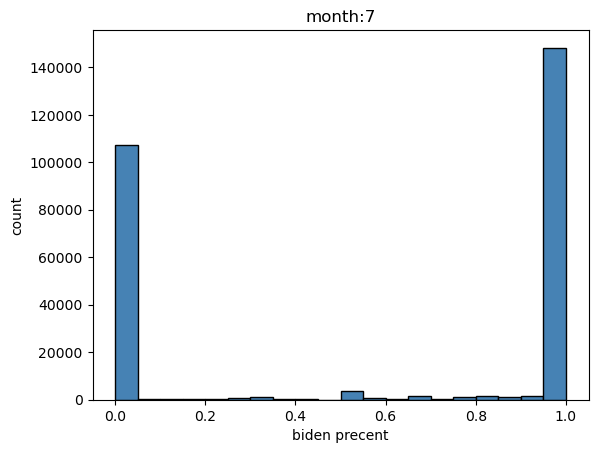

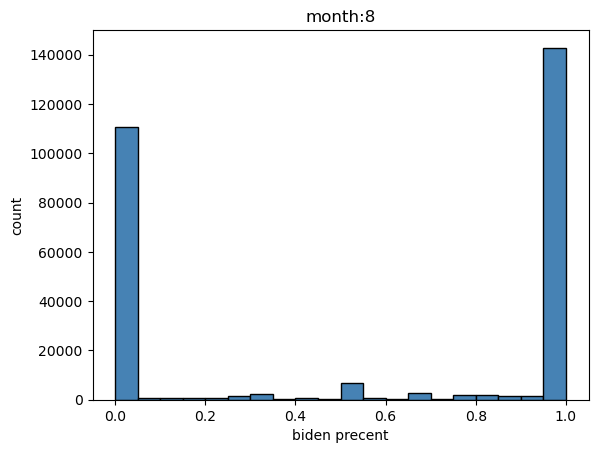

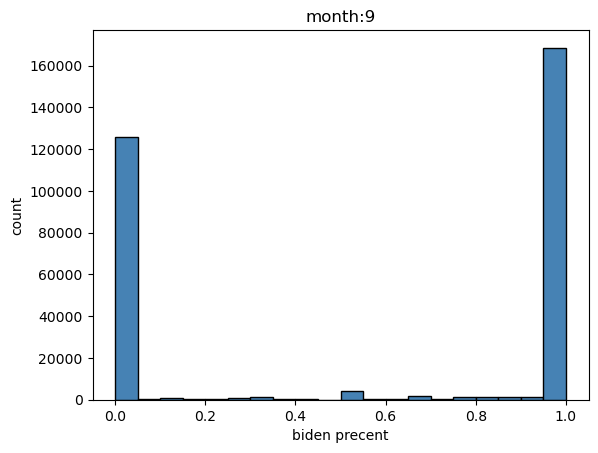

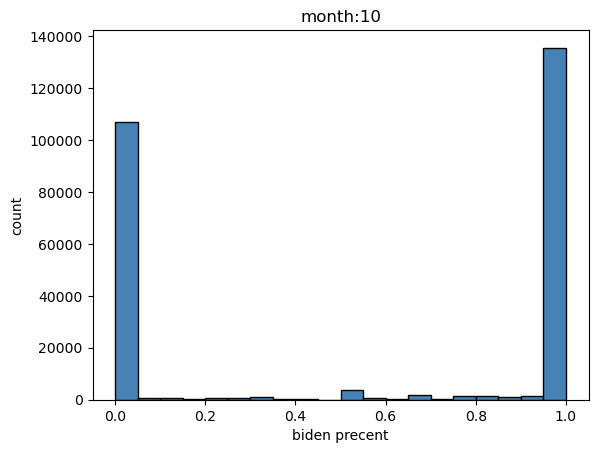

In [15]:
#绘制密度图
import os 
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib
import seaborn as sns


title_list = ["202001-202010","202001-202008","202001","202002",
              "202003","202004","202005","202006","202007","202008","202009","202010"]
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
all_=pd.DataFrame(columns=["month","user_id","biden_precent"])
upper_month = 1
for i in user_tweet_label:
    month = i[0]
    user_id = i[1]
    biden_num = user_tweet_label[i].count("JB")
    all_num =  len(user_tweet_label[i])
    biden_precent =   biden_num/all_num
    if month != upper_month:
        matplotlib.pyplot.hist(x = all_["biden_precent"], # 指定绘图数据
          bins = 20, # 指定直方图中条块的个数
          color = 'steelblue', # 指定直方图的填充色
          edgecolor = 'black' # 指定直方图的边框色
          )
        matplotlib.pyplot.xlabel('biden precent')
        matplotlib.pyplot.ylabel('count')
        matplotlib.pyplot.title("month:"+str(upper_month))
        matplotlib.pyplot.savefig("/home/kayzhou/zhangyue/"+str(upper_month)+".png",dpi=200)
        matplotlib.pyplot.show()
        
        all_=pd.DataFrame(columns=["month","user_id","biden_precent"])
    all_ = pd.concat([all_,pd.DataFrame({"month":[month],"user_id":[user_id],"biden_precent":[biden_precent]})])
    upper_month = i[0]
matplotlib.pyplot.hist(x = all_["biden_precent"], # 指定绘图数据
    bins = 20, # 指定直方图中条块的个数
    color = 'steelblue', # 指定直方图的填充色
    edgecolor = 'black' # 指定直方图的边框色
    )
matplotlib.pyplot.xlabel('biden precent')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.title("month:"+str(upper_month))
matplotlib.pyplot.savefig("/home/kayzhou/zhangyue/"+str(upper_month)+".png",dpi=200)
matplotlib.pyplot.show()


In [11]:
all_


,month,user_id,biden_precent
0,4,1223654654279421952,0.0000
0,4,934588832149835776,0.0000
0,4,894000009963724800,0.0000
0,4,830169685635145728,1.0000
0,4,700492921053663232,0.0625
...,...,...,...
0,4,1071806896435191808,0.0000
0,4,1146460582058582016,1.0000
0,4,381745546,0.0000
0,4,1256067211325734917,0.0000
